In [8]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [9]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 20

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
                "D:\data science\projects\my projects\PlantVillage",
                shuffle = True,
                image_size = (IMAGE_SIZE,IMAGE_SIZE),
                batch_size = BATCH_SIZE
            )

Found 2152 files belonging to 3 classes.


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Asus\AppData\Local\Temp\ipykernel_13180\1157603884.py:2: SyntaxWarning: invalid escape sequence '\d'
  "D:\data science\projects\my projects\PlantVillage",


In [11]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [12]:
len(dataset)

68

In [13]:
68*32

2176

In [14]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 2 1 2 0 1 2 0 1 0 1 0 0 1 0 0]


In [15]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[109. 112. 121.]
  [129. 132. 141.]
  [123. 126. 135.]
  ...
  [174. 177. 186.]
  [170. 173. 182.]
  [167. 170. 179.]]

 [[135. 138. 147.]
  [123. 126. 135.]
  [132. 135. 144.]
  ...
  [180. 183. 192.]
  [177. 180. 189.]
  [174. 177. 186.]]

 [[138. 141. 150.]
  [134. 137. 146.]
  [134. 137. 146.]
  ...
  [185. 188. 197.]
  [182. 185. 194.]
  [178. 181. 190.]]

 ...

 [[160. 163. 172.]
  [149. 152. 161.]
  [157. 160. 169.]
  ...
  [167. 169. 181.]
  [167. 169. 181.]
  [174. 176. 188.]]

 [[152. 155. 164.]
  [144. 147. 156.]
  [154. 157. 166.]
  ...
  [169. 171. 183.]
  [168. 170. 182.]
  [173. 175. 187.]]

 [[157. 160. 169.]
  [159. 162. 171.]
  [172. 175. 184.]
  ...
  [175. 177. 189.]
  [171. 173. 185.]
  [173. 175. 187.]]], shape=(256, 256, 3), dtype=float32)


In [16]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[101.  92.  97.]
  [101.  92.  97.]
  [105.  96. 101.]
  ...
  [140. 137. 144.]
  [132. 129. 136.]
  [123. 120. 127.]]

 [[103.  94.  99.]
  [101.  92.  97.]
  [103.  94.  99.]
  ...
  [138. 135. 142.]
  [139. 136. 143.]
  [137. 134. 141.]]

 [[110. 101. 106.]
  [107.  98. 103.]
  [108.  99. 104.]
  ...
  [140. 135. 142.]
  [144. 139. 146.]
  [147. 142. 149.]]

 ...

 [[110. 103. 111.]
  [108. 101. 109.]
  [107. 100. 108.]
  ...
  [140. 134. 144.]
  [136. 130. 140.]
  [136. 130. 140.]]

 [[115. 108. 116.]
  [114. 107. 115.]
  [112. 105. 113.]
  ...
  [145. 139. 149.]
  [150. 144. 154.]
  [143. 137. 147.]]

 [[113. 106. 114.]
  [114. 107. 115.]
  [110. 103. 111.]
  ...
  [128. 122. 132.]
  [140. 134. 144.]
  [131. 125. 135.]]]


In [17]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


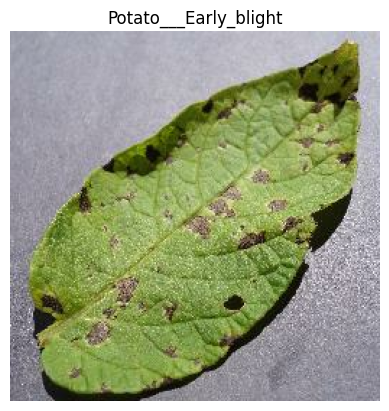

In [18]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


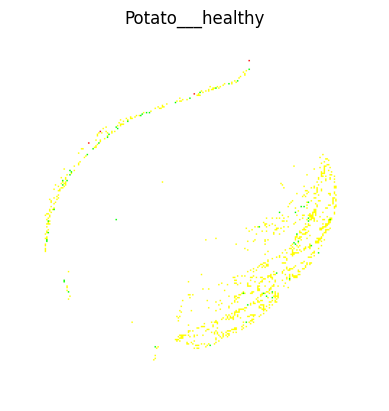

In [19]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy())
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

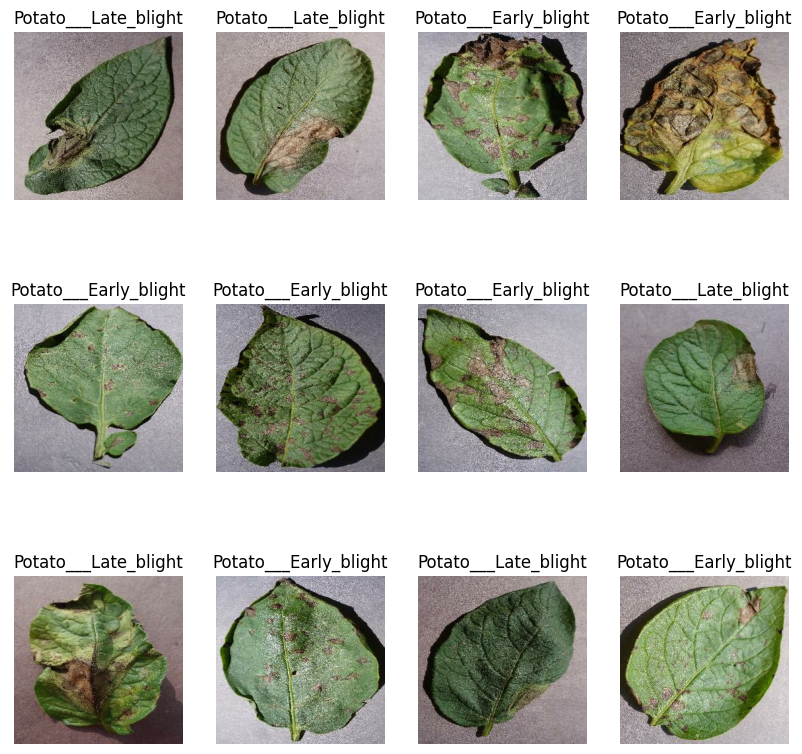

In [20]:
plt.figure(figsize =(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

80% => training 

20% => 10% validation, 10% test 

In [21]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [22]:
train_ds = dataset.take(54)
len(train_ds)

54

In [23]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [24]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [25]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [26]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [27]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [28]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [29]:
len(train_ds)

54

In [30]:
len(test_ds)

8

In [31]:
len(val_ds)

6

In [32]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [33]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/225)
])

In [34]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [35]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

d:\Data science\projects\my projects\project 14\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [38]:
history= model.fit(
            train_ds,
            epochs = EPOCH,
            batch_size = BATCH_SIZE,
            verbose = 1,
            validation_data = val_ds   
        )

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 370ms/step - accuracy: 0.4651 - loss: 4.4486 - val_accuracy: 0.5052 - val_loss: 0.8329
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 349ms/step - accuracy: 0.5316 - loss: 0.9330 - val_accuracy: 0.7031 - val_loss: 0.7339
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 348ms/step - accuracy: 0.6945 - loss: 0.7883 - val_accuracy: 0.7240 - val_loss: 0.8420
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 351ms/step - accuracy: 0.7481 - loss: 0.6959 - val_accuracy: 0.8542 - val_loss: 0.3926
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 350ms/step - accuracy: 0.8211 - loss: 0.5061 - val_accuracy: 0.8333 - val_loss: 0.4109
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 351ms/step - accuracy: 0.8694 - loss: 0.3414 - val_accuracy: 0.8385 - val_loss: 0.3806
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 350ms/step - accuracy: 0.8767 - loss: 0.3433 - val_accuracy: 0.7031 - val_loss: 0.9691
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 353ms/step - accuracy: 0.8911 - loss: 0.3515 - val_accu

In [39]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9630 - loss: 0.1522


In [40]:
scores

[0.18013204634189606, 0.96484375]

In [41]:
history

In [42]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [43]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [44]:
history.history['accuracy']

[0.5069444179534912,
 0.5561342835426331,
 0.7008101940155029,
 0.7754629850387573,
 0.8217592835426331,
 0.8680555820465088,
 0.8888888955116272,
 0.9027777910232544,
 0.9126157164573669,
 0.9056712985038757,
 0.9363425970077515,
 0.9322916865348816,
 0.9467592835426331,
 0.9461805820465088,
 0.9484953880310059,
 0.9537037014961243,
 0.9618055820465088,
 0.9664351940155029,
 0.9594907164573669,
 0.9618055820465088]

In [45]:
len(history.history['accuracy'])

20

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

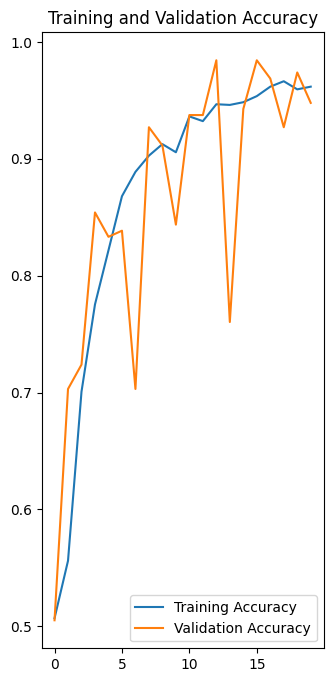

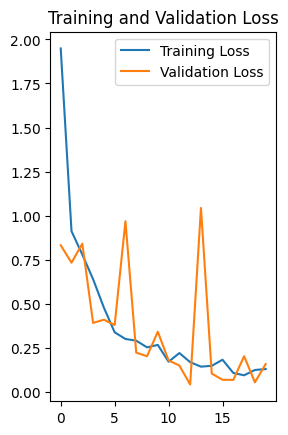

In [47]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.title('Training and Validation Accuracy')
plt.plot(range(EPOCH),acc,label = 'Training Accuracy')
plt.plot(range(EPOCH),val_acc, label= 'Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.subplot(1,2,2)
plt.title('Training and Validation Loss')
plt.plot(range(EPOCH),loss,label = 'Training Loss')
plt.plot(range(EPOCH),val_loss, label= 'Validation Loss')
plt.legend(loc='upper right')
plt.show()

In [48]:
for image_batch, labels_batch in test_ds.take(1):
    print(image_batch[0].numpy())

[[[106. 102. 116.]
  [151. 147. 161.]
  [ 97.  93. 107.]
  ...
  [178. 180. 193.]
  [178. 180. 193.]
  [173. 175. 188.]]

 [[127. 123. 137.]
  [107. 103. 117.]
  [127. 123. 137.]
  ...
  [153. 155. 168.]
  [153. 155. 168.]
  [150. 152. 165.]]

 [[126. 122. 136.]
  [ 87.  83.  97.]
  [134. 130. 144.]
  ...
  [160. 162. 175.]
  [160. 162. 175.]
  [155. 157. 170.]]

 ...

 [[137. 135. 148.]
  [154. 152. 165.]
  [136. 134. 147.]
  ...
  [180. 182. 194.]
  [184. 186. 198.]
  [174. 176. 188.]]

 [[133. 131. 144.]
  [146. 144. 157.]
  [120. 118. 131.]
  ...
  [197. 199. 211.]
  [185. 187. 199.]
  [194. 196. 208.]]

 [[138. 136. 149.]
  [132. 130. 143.]
  [131. 129. 142.]
  ...
  [194. 196. 208.]
  [167. 169. 181.]
  [189. 191. 203.]]]


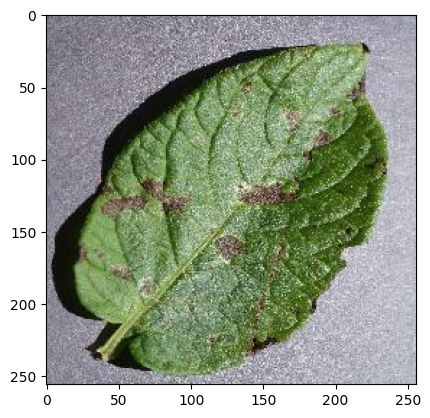

In [49]:
for image_batch, labels_batch in test_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))

In [50]:
np.argmax([1.3912741e-05,9.9998605e-01,1.9338620e-18])

1

First image to predict
Actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Predicted label: Potato___Early_blight


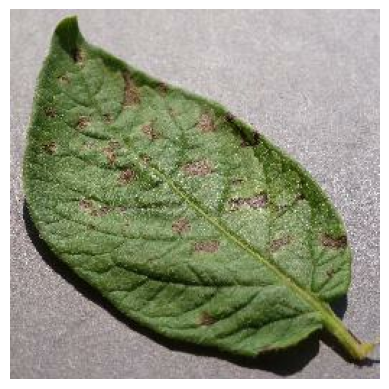

In [51]:
for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('First image to predict')
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis('off')

In [52]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)  
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


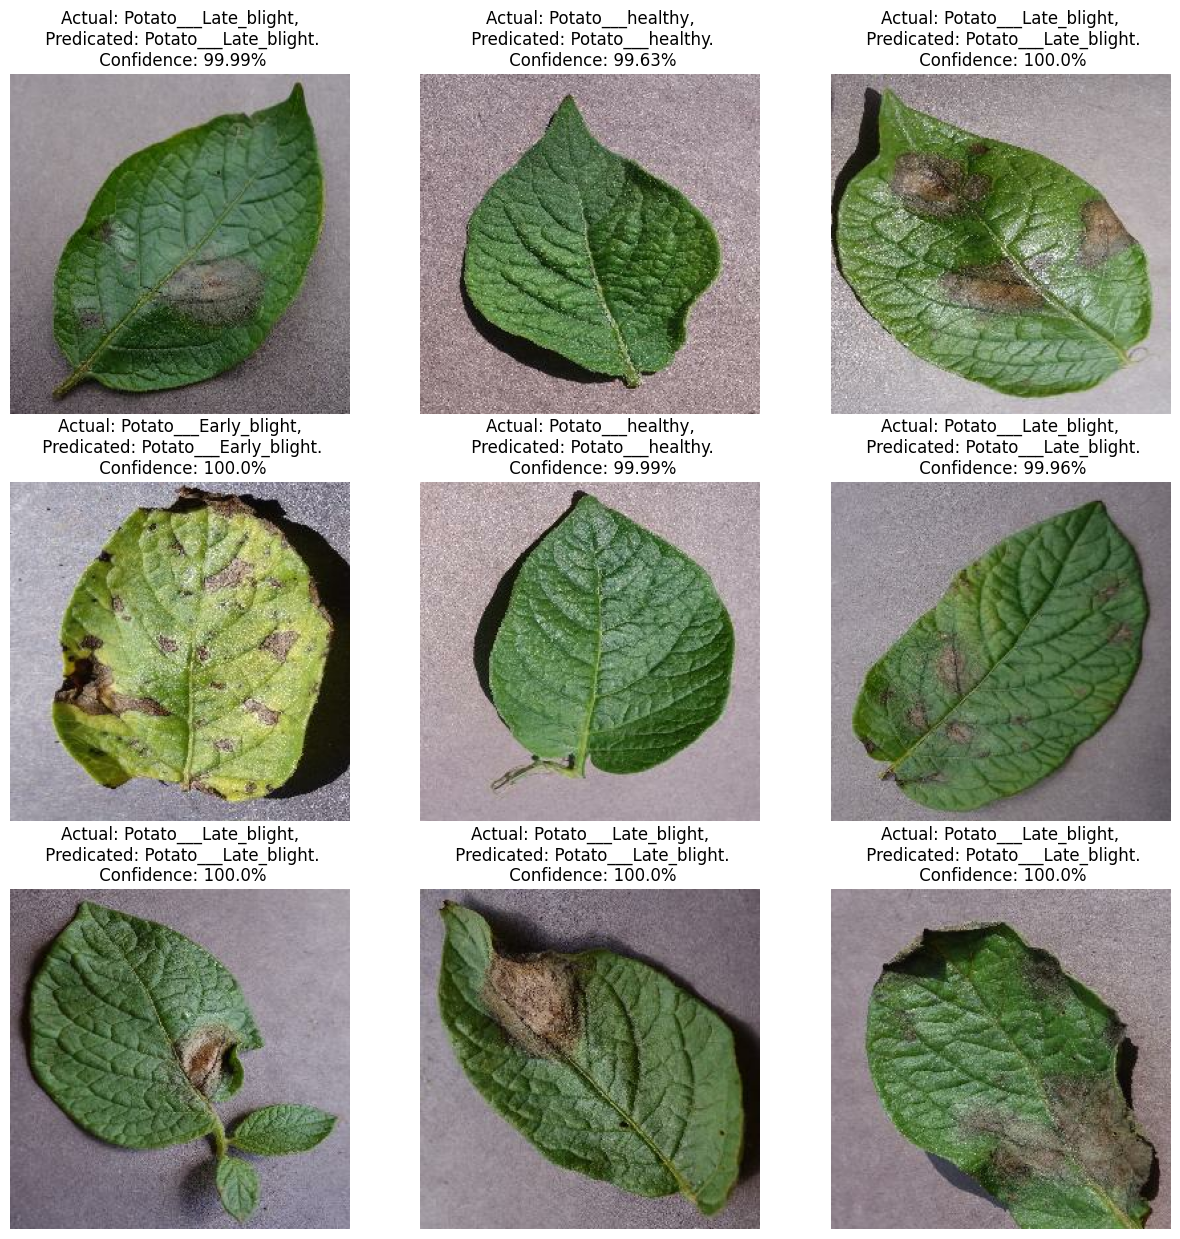

In [53]:
plt.figure(figsize=(15,15))
for image,label in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8')) 
        
        predicted_class,confidence = predict(model, image[i])
        actual_class = class_names[label[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicated: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [54]:
model_version = 2
model.export(f'D:/Data science/projects/my projects/project 14/model/{model_version}')

INFO:tensorflow:Assets written to: D:/Data science/projects/my projects/project 14/model/2\assets


INFO:tensorflow:Assets written to: D:/Data science/projects/my projects/project 14/model/2\assets


Saved artifact at 'D:/Data science/projects/my projects/project 14/model/2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2251513377232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513378768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513378384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513379152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513378192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513379728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513378960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513377424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513378576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513380688: TensorSpec(shape=(), dtype=tf.resource, name=Non

In [55]:
import os

model_version = max([int(i) for i in os.listdir("D:/Data science/projects/my projects/project 14/model/") + [0]])+1
model.export(f'D:/Data science/projects/my projects/project 14/model/{model_version}')

INFO:tensorflow:Assets written to: D:/Data science/projects/my projects/project 14/model/3\assets


INFO:tensorflow:Assets written to: D:/Data science/projects/my projects/project 14/model/3\assets


Saved artifact at 'D:/Data science/projects/my projects/project 14/model/3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2251513377232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513378768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513378384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513379152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513378192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513379728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513378960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513377424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513378576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2251513380688: TensorSpec(shape=(), dtype=tf.resource, name=Non

In [56]:
# Assuming `model` is your trained model
model_version = 1
model.save(f'D:/Data Science/Projects/My Projects/Project 14/model/{model_version}.keras')